# Pseudorapidity

In this exercise, you will study how pseudorapidities of muons that are detected in the CMS detector affect to the invariant mass distribution.

Pseudorapidity $\eta$ describes an angle $\theta$ of which the detected particle has differed from the particle beam (z-axis in Figure 1). As a function of $\theta$ (in radians), pseudorapidity is defined as

$$
\eta = -\ln(\tan(\frac{\theta}{2})).
$$

From Figure 1 we can see that a small pseudorapidity, in practice, means that the particle has differed a lot from the particle beam. Similarly, greater pseudorapidity means that the particle has continued almost among the beam line after the collision. In other words, when $\theta\longrightarrow0$, $\eta\longrightarrow\infty$ and when $\theta\longrightarrow90^\circ$, $\eta\longrightarrow0$.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 1: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

Figure 2 shows a situation where two particle beams collide. Two muons with different pseudorapidities are created in this collision (represented as dashed lines). The muon with smaller pseudorapidity hits the barrel part of the detector whereas the muon with greater pseudorapidity hits the endcap of the detector. 

<figure>
    <img src="../images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 2: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

# Exercises

Your task is to draw two histograms. One shows such muon pairs that have small pseudorapidities and the other shows muon pairs with large pseudorapidities. We can then compare those histograms to see how pseudorapidity affects the mass distributions.

## Part 1 - Pseudorapidity as a function of $\theta$

In order to see better how pseudorapidity $\eta$ and the angle $\theta$ are related, we can plot $\eta$ as a function of $\theta$. Write a function **pseudorapidity(theta)** that takes the **angle theta in degrees** as a parameter and **returns** the **pseudorapidity**. Then use your function to plot the pseudorapidity for $\theta \in \mathopen[1^{\circ},179^{\circ}\mathclose]$ 


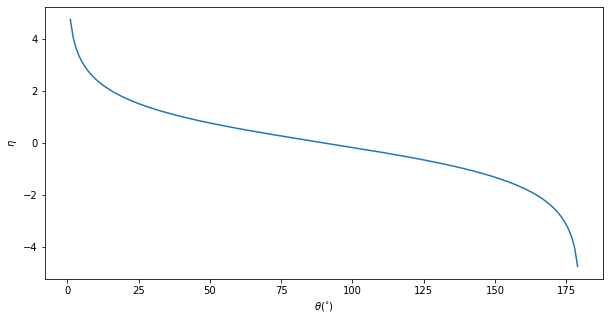

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def pseudorapidity(theta):
    angle = (theta*np.pi)/180
    return -np.log(np.tan(angle/2))

x = np.linspace(1,179,179)
y = pseudorapidity(x)

plt.figure(figsize=(10,5))
plt.plot(x, y) 
plt.xlabel(r'$\theta (^{\circ})$') 
plt.ylabel(r'$\eta$')
plt.show() 

## Part 2 - selecting events from data

Your task is to divide the dataset 'DoubleMuRun2011A.csv' to events with small pseudorapidity and large pseudorapidity. Use events where muons have smaller pseudorapidity than 0.38 for small pseudorapidities and larger than 1.52 for large pseudorapidities. Save your datasets to variables 'small_etas' and 'large_etas'.

Note that $\eta$ can also be negative so remember to take the absolute value.


In [4]:
dataset = pd.read_csv('DoubleMuRun2011A.csv')

lower_limit = 0.38
upper_limit = 1.52

small_etas = dataset[(abs(dataset.eta1) < lower_limit) & (abs(dataset.eta2) < lower_limit)]
large_etas = dataset[(abs(dataset.eta1) > upper_limit) & (abs(dataset.eta2) > upper_limit)]

# Print information of your datasets to see if they are about the same length

print('Amount of all events = %d' % len(dataset))
print('Amount of the events where the pseudorapidity of the both muons have been large: %d' %len(large_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small: %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large: 34263
Amount of the events where the pseudorapidity of the both muons have been small: 34337


## Part 3 - Plotting the histograms


Next, make histograms to compare the datasets containing small pseudorapidities and large pseudorapidities. Just like in previous exercises, we are interested in a single peak. Consider the mass range of a Z boson.

For your range of invariant masses:
1. Create distinct invariant mass histograms for both large and small eta datasets. Use 100 bins each.
1. Fit Breit-Wigner distribution to both histograms
1. Consider how pseudorapidity effects to the mass distribution (consider for example the decay width and lifetime of the particle)


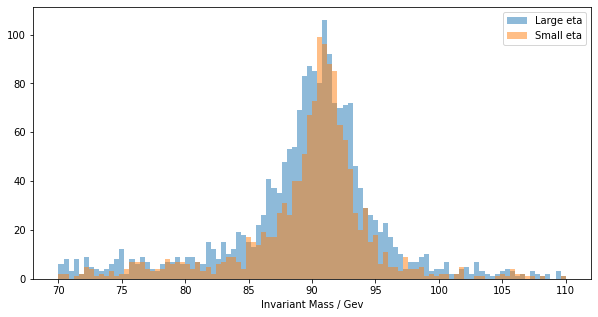

In [47]:
Smass = small_etas['M']   ##invariant masses of small and large sets
Lmass = large_etas['M']

nbins = 100
lower_limit = 70
upper_limit = 110

# plot histogram for both large and small eta

plt.figure(figsize=(10,5))
Lhist,Lbins,Spatches = plt.hist(Lmass,nbins,range=[lower_limit, upper_limit],label='Large eta',alpha=0.5)
Shist,Sbins,Spatches = plt.hist(Smass,nbins,range=[lower_limit, upper_limit],label='Small eta',alpha=0.5)   
plt.xlabel('Invariant Mass / Gev') 
plt.legend()
plt.show()




In [48]:
def breitwigner(E, gamma, M, a, b, A):
    k_n= 2*np.sqrt(2)*M*gamma*np.sqrt((M**2)*((M**2)+(gamma**2)))  # K Numerator 
    k_d= np.pi*np.sqrt((M**2)+np.sqrt((M**2)*((M**2)+(gamma**2))))  # K Denominator
    
    return a*E+b+((A*k_n)/(k_d*((((E**2)-(M**2))**2)+((M**2)*(gamma**2)))))

In [49]:
def bin_centres(bin_edges):
    return[(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]
        

Lcentres = bin_centres(Lbins)
Scentres = bin_centres(Sbins)



In [70]:
# define parameter accuracy, initial guess and iteration counters

accuracy = 1e-5
p0 = [5, 90,-1, 100, 100]


# large eta
while True: # Loop until desired accuracy
    Lcurve, Lcovar  = curve_fit(breitwigner, Lcentres, Lhist, p0)
    Lerror = max(abs(p0-Lcurve))
    if Lerror < accuracy: 
        break
    p0 = Lcurve

# small eta
while True: # Loop until desired accuracy
    Scurve, Scovar  = curve_fit(breitwigner, Scentres, Shist, p0=p0)
    Serror = max(abs(p0-Scurve))
    if Serror < accuracy: 
        break
    p0 = Scurve
    
print(f"Large Eta {Lcurve}")
print(f"Small Eta {Scurve}")

Large Eta [ 5.39248389e+00  9.07394670e+01 -1.19131852e-01  1.12301739e+01
  7.95292031e+02]
Small Eta [ 3.54135971e+00  9.09947405e+01 -9.79425688e-02  9.67575541e+00
  5.31690101e+02]


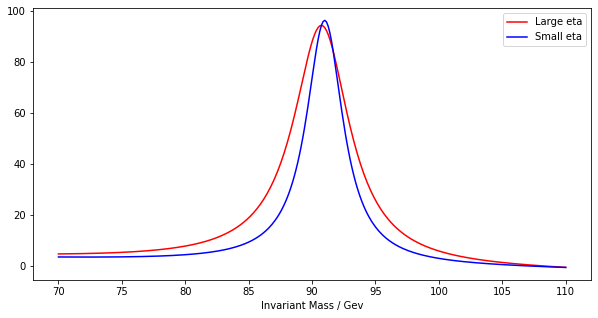

Large pseudorapidity:
Gamma is 5.392 +/- 0.191
M     is 90.739 +/- 0.054
a     is -0.119 +/- 0.038
b     is 11.230 +/- 3.441
A     is 795.292 +/- 24.634

Small pseudorapidity:
Gamma is 3.541 +/- 0.104
M     is 90.995 +/- 0.032
a     is -0.098 +/- 0.028
b     is 9.676 +/- 2.518
A     is 531.690 +/- 12.690


In [74]:
# Plot curves

plt.figure(figsize=(10,5))
xpoints = np.linspace(lower_limit,upper_limit,300)

# Large Eta
plt.plot(xpoints,breitwigner(xpoints, -Lcurve[0],
                             -Lcurve[1],Lcurve[2],
                             Lcurve[3], Lcurve[4]),
                             'r-',label='Large eta')
Lerrors = np.sqrt(abs(np.diag(Lcovar)))

# Small Eta
plt.plot(xpoints,breitwigner(xpoints, -Scurve[0],
                             -Scurve[1],Scurve[2],
                             Scurve[3], Scurve[4]),
                             'b-',label='Small eta')
Serrors = np.sqrt(abs(np.diag(Scovar)))


plt.xlabel('Invariant Mass / Gev') 
plt.legend()
plt.show()

# Large Eta
print("Large pseudorapidity:")
print("Gamma is","{:.3f}".format(Lcurve[0]), "+/-", "{:.3f}".format(Lerrors[0]))
print("M     is","{:.3f}".format(Lcurve[1]), "+/-","{:.3f}".format(Lerrors[1]))
print("a     is","{:.3f}".format(Lcurve[2]), "+/-","{:.3f}".format(Lerrors[2]))
print("b     is","{:.3f}".format(Lcurve[3]), "+/-","{:.3f}".format(Lerrors[3]))
print("A     is","{:.3f}".format(Lcurve[4]), "+/-","{:.3f}".format(Lerrors[4]))
print()
# Small Eta
print("Small pseudorapidity:")
print("Gamma is","{:.3f}".format(Scurve[0]), "+/-", "{:.3f}".format(Serrors[0]))
print("M     is","{:.3f}".format(Scurve[1]), "+/-","{:.3f}".format(Serrors[1]))
print("a     is","{:.3f}".format(Scurve[2]), "+/-","{:.3f}".format(Serrors[2]))
print("b     is","{:.3f}".format(Scurve[3]), "+/-","{:.3f}".format(Serrors[3]))
print("A     is","{:.3f}".format(Scurve[4]), "+/-","{:.3f}".format(Serrors[4]))



In [76]:
def lifetime(decayWidth):
    hbar = 6.626e-34 / (2*np.pi*1.602e-19*1e9)   # GeV*s
    return hbar/decayWidth

#large eta
Ltau = lifetime(Lcurve[0])
Ltau_minus = lifetime(Lcurve[0]-Lerrors[0])
Ltau_plus = lifetime(Lcurve[0]+Lerrors[0])
Ltau_error = max(Ltau_minus-Ltau,Ltau-Ltau_plus)

print("Large pseudorapidity:")
print("The lifetime of the particle is","{:.5e}".format(Ltau), "+/-", "{:.5e}".format(Ltau_error),"s")
print()
# small eta
Stau = lifetime(Scurve[0])
Stau_minus = lifetime(Scurve[0]-Serrors[0])
Stau_plus = lifetime(Scurve[0]+Serrors[0])
Stau_error = max(Stau_minus-Stau,Stau-Stau_plus)

print("Small pseudorapidity:")
print("The lifetime of the particle is","{:.5e}".format(Stau), "+/-", "{:.5e}".format(Stau_error),"s")


Large pseudorapidity:
The lifetime of the particle is 1.22073e-25 +/- 4.47414e-27 s

Small pseudorapidity:
The lifetime of the particle is 1.85883e-25 +/- 5.61134e-27 s


The smaller the pseudorapidity, the smaller the decay width. There is a smaller deviation of masses, therefore, the greater the lifetime of the particle. 
This is probaby due to a larger energy collsions for smaller pseudorapidity, as the particles' direction has differed a lot from the orignal beam. This creates a smaller deviation of particles to be detected.
